In [ ]:
## need to put link to github here

## 1) Load in the appropriate csv file as a pandas dataframe 

In [2]:
## import csv file 
import pandas as pd
batting_df=pd.read_csv("Batting.csv") 

## add columns PA, Average, OBP
batting_df['PA']=batting_df['AB']+batting_df['BB']+batting_df['IBB']+batting_df['SH']+batting_df['SF']
batting_df['Average']=batting_df['H']/batting_df['AB']
batting_df['OBP']=((batting_df['H']+batting_df['BB']+batting_df['IBB']+batting_df['SH']+batting_df['SF'])/batting_df['AB'])

## 2) Print out the dimensions and info about the dataframe you just created

In [2]:
batting_df.info

<bound method DataFrame.info of          playerID  nameFirst     nameLast  birthYear  yearID  stint teamID  \
0       abercda01      Frank  Abercrombie       1850    1871      1    TRO   
1        addybo01        Bob         Addy       1842    1871      1    RC1   
2       allisar01        Art      Allison       1849    1871      1    CL1   
3       allisdo01       Doug      Allison       1846    1871      1    WS3   
4       ansonca01        Cap        Anson       1852    1871      1    RC1   
5       armstbo01     Robert    Armstrong       1850    1871      1    FW1   
6       barkeal01         Al       Barker       1839    1871      1    RC1   
7       barnero01       Ross       Barnes       1850    1871      1    BS1   
8       barrebi01       Bill      Barrett          0    1871      1    FW1   
9       barrofr01      Frank      Barrows       1844    1871      1    BS1   
10       bassjo01       John         Bass       1848    1871      1    CL1   
11      battijo01        Joe    

In [3]:
batting_df.shape

(102816, 28)

## 3) How many players have hit 40 or more HRs in one single season? (Number only)

In [4]:
df2 = batting_df.groupby(['playerID','yearID']).sum()
df2 = df2[df2['HR'] >= 40]
df2 = df2.groupby(['playerID'])
len(df2)

142

## 4) How many players have hit more than 600 HRs for their career? (Dataframe)


In [90]:
df3 = batting_df[['playerID','nameFirst','nameLast','HR']]
df3 = df3.groupby(['playerID','nameFirst','nameLast']).sum()
df3 = df3[df3['HR'] > 600]
df3

,,,HR
playerID,nameFirst,nameLast,
aaronha01,Hank,Aaron,755
bondsba01,Barry,Bonds,762
griffke02,Ken,Griffey,630
mayswi01,Willie,Mays,660
rodrial01,Alex,Rodriguez,696
ruthba01,Babe,Ruth,714
sosasa01,Sammy,Sosa,609
thomeji01,Jim,Thome,612


## 5) How many players have hit 40 2Bs, 10 3Bs, 200 Hits, and 30 HRs (inclusive) in one season? (Number Only)


In [75]:
df4 = batting_df[['playerID','yearID','2B','3B','H','HR']]
df4 = df4.groupby(['playerID','yearID']).sum()
df4 = df4[(df4['2B'] >= 40) & (df4['3B'] >= 10) & (df4['H'] >= 200) & (df4['HR'] >= 30)]
df4 = df4.groupby(['playerID'])
len(df4)

11

## 6) How many players have had 100 or more SBs in a season? (Dataframe)


In [33]:
df5 = batting_df[['playerID','nameFirst','nameLast','yearID','SB']]
df5 = df5.groupby(['playerID','nameFirst','nameLast','yearID']).sum()
df5 = df5[df5['SB']>=100]
df5


SB
playerID  nameFirst nameLast  yearID       
brocklo01 Lou       Brock     1974    118.0
brownpe01 Pete      Browning  1887    103.0
brownto01 Tom       Brown     1891    106.0
colemvi01 Vince     Coleman   1985    110.0
                              1986    107.0
                              1987    109.0
comisch01 Charlie   Comiskey  1887    117.0
fogarji01 Jim       Fogarty   1887    102.0
hamilbi01 Billy     Hamilton  1889    111.0
                              1890    102.0
                              1891    111.0
henderi01 Rickey    Henderson 1980    100.0
                              1982    130.0
                              1983    108.0
lathaar01 Arlie     Latham    1887    129.0
                              1888    109.0
nicolhu01 Hugh      Nicol     1887    138.0
                              1888    103.0
wardjo01  John      Ward      1887    111.0
willsma01 Maury     Wills     1962    104.0

## 7) How many players in the 1960s have hit more than 200 HRs? (Dataframe)


In [56]:
df7 = batting_df[(batting_df['yearID'] >= 1960) & (batting_df['yearID'] < 1970)] 
df7 = df7[['playerID','nameFirst','nameLast','HR']]
df7 = df7.groupby(['playerID','nameFirst','nameLast']).sum()
df7 = df7[df7['HR']>=200]
df7

,,,HR
playerID,nameFirst,nameLast,
aaronha01,Hank,Aaron,375
allisbo01,Bob,Allison,225
bankser01,Ernie,Banks,269
cashno01,Norm,Cash,278
cepedor01,Orlando,Cepeda,254
colavro01,Rocky,Colavito,245
howarfr01,Frank,Howard,288
kalinal01,Al,Kaline,210
killeha01,Harmon,Killebrew,393


## 8) Who has hit the most HRs in history? (Dataframe)

In [57]:
df8 = batting_df[['playerID','nameFirst','nameLast','HR']]
df8 = df8.groupby(['playerID','nameFirst','nameLast']).sum()
df8.nlargest(1,'HR')

,,,HR
playerID,nameFirst,nameLast,
bondsba01,Barry,Bonds,762


## 9) Who had the most hits in the 1970s? (Dataframe)

In [33]:
df9 = batting_df[(batting_df['yearID'] >= 1970) & (batting_df['yearID'] < 1979)]
df9 = df9[['playerID','nameFirst','nameLast','H']]
df9 = df9.groupby(['playerID','nameFirst','nameLast']).sum()
df9.nlargest(1,'H')

,,,H
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,1837


## 10) Top 5 highest OBP (on base percentage) with at least 500 PAs in 1977?  (Dataframe)

In [55]:
df10 = batting_df[batting_df['yearID'] == 1977]
df10 = df10[['playerID','yearID','nameFirst','nameLast','OBP','PA']]
df10 = df10.groupby(['playerID','yearID','nameFirst','nameLast','OBP']).sum()
df10 = df10[(df10['PA']>=500)]
df10 = df10.reset_index()
df10.nlargest(5,'OBP')

,playerID,yearID,nameFirst,nameLast,OBP,PA
114,singlke01,1977,Ken,Singleton,0.563433,662.0
117,smithre06,1977,Reggie,Smith,0.559426,611.0
128,tenacge01,1977,Gene,Tenace,0.556064,578.0
54,hargrmi01,1977,Mike,Hargrove,0.540952,649.0
21,carewro01,1977,Rod,Carew,0.534091,706.0


## 11) Top 8 highest averages in 2013 with at least 300 PAs? (Dataframe)

In [54]:
df11 = batting_df[['playerID','yearID','nameFirst','nameLast','Average','PA']]
df11 = df11[df11['yearID'] == 2013]
df11 = df11.groupby(['playerID','yearID','nameFirst','nameLast','Average']).sum()
df11 = df11[(df11['PA']>=300)]
df11 = df11.reset_index()
df11.nlargest(8,'Average')

,playerID,yearID,nameFirst,nameLast,Average,PA
35,cabremi01,2013,Miguel,Cabrera,0.347748,666.0
202,ramirha01,2013,Hanley,Ramirez,0.345395,336.0
53,cuddymi01,2013,Michael,Cuddyer,0.331288,543.0
149,mauerjo01,2013,Joe,Mauer,0.323596,515.0
245,troutmi01,2013,Mike,Trout,0.322581,717.0
118,johnsch05,2013,Chris,Johnson,0.321012,550.0
82,freemfr01,2013,Freddie,Freeman,0.319419,632.0
195,puigya01,2013,Yasiel,Puig,0.319372,427.0


## 12) Leaders in hits from 1940 up to and including 1949. (Dataframe)

In [71]:
df12 = batting_df[(batting_df['yearID'] >= 1940) & (batting_df['yearID'] < 1950)]
df12 = df12[['playerID','nameFirst','nameLast','H']]
df12 = df12.groupby(['playerID','nameFirst','nameLast']).sum()
df12.nlargest(10,'H')

,,,H
playerID,nameFirst,nameLast,
boudrlo01,Lou,Boudreau,1578
elliobo01,Bob,Elliott,1563
walkedi02,Dixie,Walker,1512
musiast01,Stan,Musial,1432
doerrbo01,Bobby,Doerr,1407
holmeto01,Tommy,Holmes,1402
applilu01,Luke,Appling,1376
nichobi01,Bill,Nicholson,1328
marioma01,Marty,Marion,1310


## 13) Who led MLB with the most hits the most times?  And how many times?  (Dataframe, Number)

In [29]:
df13 = batting_df[['yearID','playerID','nameFirst','nameLast','H']]
maxH = df13.loc[df13.groupby('yearID')['H'].idxmax()]
maxH = maxH['playerID'].value_counts()
maxH.head(1)

cobbty01    7
Name: playerID, dtype: int64

## 14) Which players have played the most games for their careers?  Top 5, descending by games played presented as a dataframe

In [102]:
df14 = batting_df[['playerID','nameFirst','nameLast','G']]
df14 = df14.groupby(['playerID','nameFirst','nameLast']).sum()
df14.nlargest(5,'G')

,,,G
playerID,nameFirst,nameLast,
rosepe01,Pete,Rose,3562
yastrca01,Carl,Yastrzemski,3308
aaronha01,Hank,Aaron,3298
henderi01,Rickey,Henderson,3081
cobbty01,Ty,Cobb,3035


## 15) How many players have had more than 3000 hits for their careers while also hitting 500 or more HRs?  Just a number is okay here

In [2]:
df15 = batting_df.groupby(['playerID']).sum()
df15 = sum(df15['H'] > 3000) & sum(df15['HR'] >= 500)
df15 

25

## 16) How many HRs were hit during the entire 1988 season?  Just a number is okay here

In [124]:
df16 = batting_df[batting_df['yearID'] == 1988]
df16 = sum(df16['HR'])
df16

3180

## 17) Please filter out and show me the top 3 average seasons by Wade Boggs during his career in seasons in which he had at least 500 ABs.  I would like a dataframe sorted by average.

In [106]:
df17 = batting_df[(batting_df['nameFirst'] == "Wade") & (batting_df['nameLast'] == "Boggs") & (batting_df['AB'] >= 500)]
df17 = df17[['nameFirst','nameLast','yearID','AB','Average']]
df17.nlargest(3,'Average')

,nameFirst,nameLast,yearID,AB,Average
62316,Wade,Boggs,1985,653,0.367534
65391,Wade,Boggs,1988,584,0.366438
64335,Wade,Boggs,1987,551,0.362976


## 18) Please filter out the top OBPs for the 1995 season with at least 400 PAs, sorted by OBP.  I would like a dataframe for this

In [67]:
df18 = batting_df[['playerID','yearID','nameFirst','nameLast','OBP','PA']]
df18 = df18[df18['yearID'] == 1995]
df18 = df18.groupby(['playerID','yearID','nameFirst','nameLast','OBP']).sum()
df18 = df18[(df18['PA']>=400)]
df18 = df18.reset_index()
df18.nlargest(10,'OBP')


,playerID,yearID,nameFirst,nameLast,OBP,PA
146,thomafr04,1995,Frank,Thomas,0.667343,670.0
103,martied01,1995,Edgar,Martinez,0.628180,650.0
107,mcgwima01,1995,Mark,McGwire,0.586751,416.0
18,bondsba01,1995,Barry,Bonds,0.583004,652.0
42,davisch01,1995,Chili,Davis,0.577830,534.0
100,magadda01,1995,Dave,Magadan,0.551724,431.0
147,thomeji01,1995,Jim,Thome,0.542035,555.0
7,baineha01,1995,Harold,Baines,0.524675,472.0
158,weisswa01,1995,Walt,Weiss,0.524590,540.0
17,boggswa01,1995,Wade,Boggs,0.510870,546.0


## 19) Who had the most 3Bs (in total) in 1922, 1925, 1926, and 1928?  I would like a dataframe with just the leader

In [199]:
df19 = batting_df[batting_df['yearID'].isin([1922,1925,1926,1928])]
df19 = df19[['playerID','nameFirst','nameLast','3B']]
df19 = df19.groupby(['playerID','nameFirst','nameLast']).sum()
df19.nlargest(1,'3B')

,,,3B
playerID,nameFirst,nameLast,
walkecu01,Curt,Walker,59


## 20) How many players have hit 30 or more HRs in season while also stealing (SB) 30 more or bases?  A number is okay here

In [39]:
df20 = batting_df.groupby(['playerID','yearID']).sum()
df20 = df20[(df20['HR'] >= 30) & (df20['SB'] >= 30)]
df20 = df20.groupby('playerID')
len(df20)

38

## 21) Who had the highest OBP in 1986 with at least 400 PAs? (Dataframe)

In [70]:
df21 = batting_df[['playerID','yearID','nameFirst','nameLast','OBP','PA']]
df21 = df21[df21['yearID'] == 1986]
df21 = df21.groupby(['playerID','yearID','nameFirst','nameLast','OBP']).sum()
df21 = df21[(df21['PA']>=400)]
df21 = df21.reset_index()
df21.nlargest(1,'OBP')

,playerID,yearID,nameFirst,nameLast,OBP,PA
12,boggswa01,1986,Wade,Boggs,0.575862,707.0


## 22) Same question but for 1997 and only in the NL (check league ID)? (Dataframe)

In [71]:
df22 = batting_df[['playerID','yearID','nameFirst','nameLast','PA','OBP','lgID']]
df22 = df22[(df22['yearID'] == 1997) & (df22['lgID']=="NL")]
df22 = df22.groupby(['playerID','yearID','nameFirst','nameLast','OBP','lgID']).sum()
df22 = df22[(df22['PA']>=400)]
df22 = df22.reset_index()
df22 = df22.nlargest(1,'OBP')
df22

,playerID,yearID,nameFirst,nameLast,OBP,lgID,PA
10,bondsba01,1997,Barry,Bonds,0.637218,NL,716.0


## 23) Who had more than the league average HRs in 2012 (filter out all players with less 500 PAs)? (Dataframe)

In [40]:
batting_df['avghr'] = batting_df['HR'].mean()
df23 = batting_df[['playerID','yearID','nameFirst','nameLast','PA','HR','avghr']]
df23 = df23[df23['yearID']==2012]
df23 = df23.groupby(['playerID','yearID','nameFirst','nameLast','avghr']).sum()
df23 = df23[df23['PA'] > 500]
df23 = df23[df23['HR'] > 2.813599]
df23

,,,,,PA,HR
playerID,yearID,nameFirst,nameLast,avghr,,
ackledu01,2012,Dustin,Ackley,2.813599,675.0,12
alonsyo01,2012,Yonder,Alonso,2.813599,625.0,9
altuvjo01,2012,Jose,Altuve,2.813599,624.0,7
alvarpe01,2012,Pedro,Alvarez,2.813599,591.0,30
andruel01,2012,Elvis,Andrus,2.813599,706.0,3
aokino01,2012,Nori,Aoki,2.813599,576.0,10
avilemi01,2012,Mike,Aviles,2.813599,544.0,13
aybarer01,2012,Erick,Aybar,2.813599,549.0,8
barneda01,2012,Darwin,Barney,2.813599,586.0,7


## 24) Who is the youngest player to hit 50 or more HRs in a single season? (Dataframe)

In [72]:
batting_df['Age']=batting_df['yearID']-batting_df['birthYear']
df24 = batting_df[['playerID','yearID','nameFirst','nameLast','HR','Age']]
df24 = df24.groupby(['playerID','yearID','nameFirst','nameLast']).sum()
df24 = df24[df24['HR']>=50].nsmallest(1,'Age')
df24

,,,,HR,Age
playerID,yearID,nameFirst,nameLast,,
fieldpr01,2007,Prince,Fielder,50,23


## 25) Who are the five youngest players to hit 300 or more HRs for their career? (Dataframe)

In [63]:
df25 = batting_df[['playerID','nameFirst','nameLast','HR','Age']]
df25 = df25.groupby(['playerID','nameFirst','nameLast','Age']).sum().groupby(level=[0]).cumsum()
df25 = df25[df25['HR'] >= 300]
df25 = df25.reset_index() 
df25.nsmallest(5,'Age')

,playerID,nameFirst,nameLast,Age,HR
213,foxxji01,Jimmie,Foxx,28,302
338,jonesan01,Andruw,Jones,28,301
520,ottme01,Mel,Ott,28,306
567,pujolal01,Albert,Pujols,28,319
617,rodrial01,Alex,Rodriguez,28,345


## BONUS: Graph total HRs per season using bar graph

Text(0,0.5,'Number of HRs')

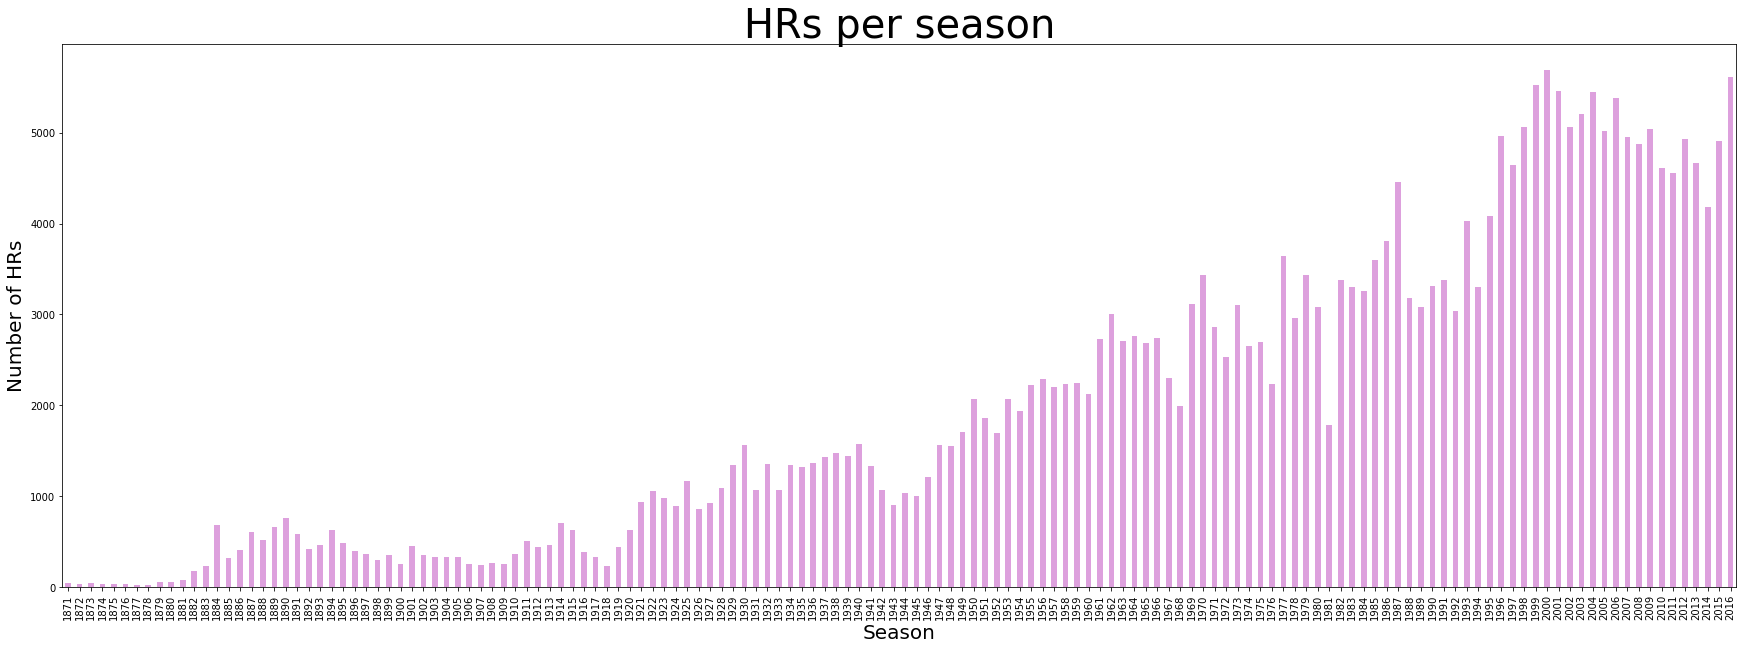

In [46]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df26 = batting_df.groupby(['yearID'])['HR'].sum()
plt.figure(figsize=(30, 10))
ax = df26.plot(kind='bar',color='plum')
ax.set_title("HRs per season", fontsize=40)
ax.set_xlabel("Season", fontsize=20)
ax.set_ylabel("Number of HRs", fontsize=20)


## BONUS: Using a line graph please graph the average HRs per AB (think about this) per season

In [47]:
## create new variable HR/AB  
batting_df['HRperAB']=batting_df['HR'] / batting_df['AB']

Text(0,0.5,'Avg HRs per AB')

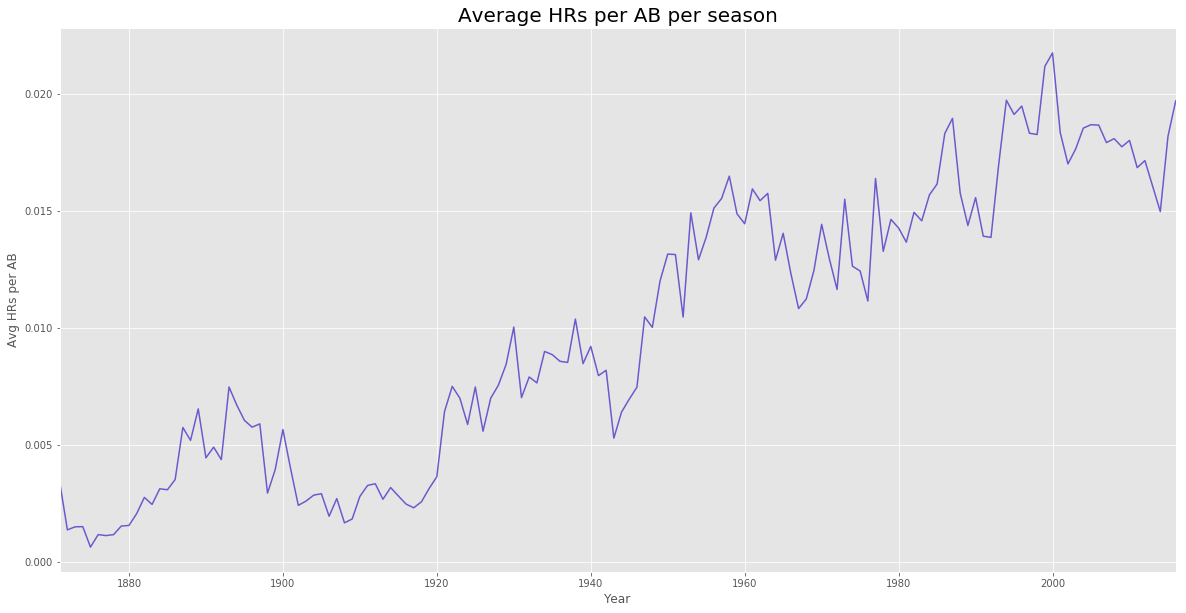

In [51]:
df27 = batting_df.groupby(['yearID'])['HRperAB'].mean()
matplotlib.style.use('ggplot')
plt.figure(figsize=(20, 10))
ax = df27.plot(color='slateblue')
ax.set_title("Average HRs per AB per season", fontsize=20)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Avg HRs per AB", fontsize=12)